# **MSDS 692 Data Science Practicum I: "Recipe for Success: Data-Driven Strategies for New Restaurant Owners in San Diego" by Tia Page**


  This project titled "Recipe for Success: Data-Driven Strategies for New Restaurant Owners in San Diego," aims to provide data-driven insights to help new and prospective restaurant owners succeed in San Diego's competitive market. The goals of this project are to identify key success factors for restaurants in San Diego, recommend optimal locations in the city to establish one's restaurant, and find strategies to enhance customer experience. All of these factors are essential in navigating the competitive nature of San Diego's food industry.

  This project utilizes Python to analyze data from various sources, including restaurant reviews, demographic data, and geographic information. The code is organized into sections for data collection, cleaning, exploratory analysis, machine learning, and visualization to achieve these goals. By leveraging these techniques, this project empowers aspiring restaurant owners with the knowledge to thrive in San Diego's culinary landscape.

## **Data Collection**
This project leverages a multi-faceted data collection approach to gather comprehensive information on San Diego restaurants and their surrounding market. The data collection process involved the following key steps:

* **San Diego Zip Codes and Neighborhoods:** A list of San Diego zip codes and their corresponding neighborhood names was retrieved using web scraping techniques from the website BkylnDesigns.com.
This data provides the geographic foundation for the analysis, enabling the segmentation and comparison of restaurants across different neighborhoods.

* **Land Area Information:** Land area data for each San Diego zip code was obtained through web scraping from USA.com. This information allows for the calculation of population density, which can be a crucial factor in understanding restaurant performance and market saturation.

* **Demographic information** for each zip code, including population, number of households, median income, and average income, was collected from Point2Homes.com.
Due to website restrictions, this data was manually compiled from an online table into an Excel spreadsheet.
Demographic data provides insights into the socioeconomic characteristics of different neighborhoods, helping to understand customer profiles and potential market segments.

* **Restaurant Listings and Google Review URLs:** A list of restaurants and their corresponding Google Review URLs was extracted using the Octoparse data extraction tool. The tool's "Google Maps Listings Scraper" template was used, with the keyword "Restaurants in [insert zip code]" to target specific areas. This data provides the core restaurant information for the analysis, including names, ratings, and review counts.

* **Restaurant Reviews:** Google reviews for each restaurant were collected using the Octoparse data extraction tool's "Google Reviews Scraper" template. This involved inputting the previously collected Google Review URLs to extract individual reviews and their associated ratings. Review data provides valuable insights into customer sentiment, preferences, and experiences, allowing for a deeper understanding of restaurant performance and areas for improvement.

**Below are the steps for data collection:**

1) Retrieving a list of San Diego **Zip Codes** with their neighborhood names via **webscraping** BkylnDesigns.com using **Python library BeautifulSoup** at the url: www.bklyndesigns.com/san-diego-zip-codes/

In [1]:
# List of San Diego Zipcodes with Their Neighborhood Names

# Install necessary libraries and packages
!pip install pandas requests beautifulsoup4

import pandas as pd
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://bklyndesigns.com/san-diego-zip-codes/"

# Send a GET request to the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the webpage content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the table on the webpage
    table = soup.find('table')

    # Extract the rows from the table
    rows = table.find_all('tr')

    # Initialize a list to store the data
    data = []

    # Loop through the rows and extract ZIP code and address
    for row in rows[1:]:  # Skip the header row
        cols = row.find_all('td')
        if len(cols) >= 2:  # Ensure there are enough columns
            zip_code = cols[0].text.strip()
            address = cols[1].text.strip()
            data.append({'ZIP Code': zip_code, 'Address': address})

# Create a Data Frame from the extracted data
    df_zip = pd.DataFrame(data)
# Save Data Frame as a CSV file
    df_zip.to_csv('sd_neighborhoods.csv', index=False)

else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

In [2]:
# Preview data set
df_zip.head(10)

,ZIP Code,Address
0,92101,"Downtown, San Diego"
1,92102,San Diego
2,92103,Hillcrest
3,92104,North Park
4,92105,City Heights
5,92106,Point Loma
6,92107,Ocean Beach
7,92108,Mission Valley
8,92109,Pacific Beach
9,92110,Old Town


2) Retrieving **land area information** of each San Diego zip code via **Webscraping** USA.com. Each zip code used for this code was obtained from the previous file created called "sd_neighborhoods.csv."

In [3]:
import re

# List of San Diego ZIP codes
zip_codes = ["91942", "92037", "92101", "92102", "92103", "92104", "92105", "92106",
              "92107", "92108", "92109", "92110", "92111", "92113", "92114", "92115",
              "92116", "92117", "92119", "92120", "92121", "92122", "92123", "92124",
              "92126", "92127", "92128", "92129", "92130", "92131", "92142", "92150",
              "92153"]
# Base URL
base_url = "http://www.usa.com/"

# List to store results
results = []

# Function to get land area
def get_land_area(zip_code):
    url = f"{base_url}{zip_code}-ca.htm"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Look for all tables
        tables = soup.find_all('table')

        for table in tables:
            for row in table.find_all('tr'):
                cells = row.find_all('td')

                # Ensure there are enough cells
                if len(cells) >= 2:
                    label = cells[0].text.strip().lower()  # Convert label to lowercase
                    value = cells[1].text.strip()  # Get the corresponding value

                    # Check for "land area"
                    if 'land area' in label:
                        # Extract just the numeric part
                        land_area_value = re.search(r'(\d+\.?\d*)\s*sq mi', value)
                        if land_area_value:
                            return land_area_value.group(1) + " sq mi"

        print(f"'Land Area' not found in tables for ZIP Code: {zip_code}")
        return None
    else:
        print(f"Failed to retrieve data for ZIP Code: {zip_code}, Status Code: {response.status_code}")
        return None

# Loop through each ZIP code and collect the results
for zip_code in zip_codes:
    land_area = get_land_area(zip_code)
    results.append({"ZIP Code": zip_code, "Land Area": land_area})

# Create a DataFrame from the results
df_land_area = pd.DataFrame(results)

# Save as CSV file
df_land_area.to_csv('sd_land_area.csv', index=False)

# Preview data
df_land_area.head(50)

'Land Area' not found in tables for ZIP Code: 92142
'Land Area' not found in tables for ZIP Code: 92150
'Land Area' not found in tables for ZIP Code: 92153


,ZIP Code,Land Area
0,91942,5.84 sq mi
1,92037,13.08 sq mi
2,92101,4.72 sq mi
3,92102,4.63 sq mi
4,92103,3.77 sq mi
5,92104,3.79 sq mi
6,92105,5.57 sq mi
7,92106,5.64 sq mi
8,92107,3.15 sq mi
9,92108,4.28 sq mi


3) Retrieving **demographic information** for each zip code related to population, number of households, median income, and average income via Point2Homes.com through the url: https://www.point2homes.com/US/Neighborhood/CA/San-Diego-Demographics.html#MedianIncomeByZipcode

Because the Point2Homes.com website does not permit Webscraping, I collected the demographic data for each zip code through copy and pasting the table containing the information in an Excel spreadsheet. The file with this information (sd_demographics.xlsx) can be downloaded in the Github folder for this project and can be viewed in a Python environment using the code below.

In [4]:
# Downloading demographics data for each San Diego zipcode
df_demographics = pd.read_excel('/content/sd_demographics.xlsx')

# Viewing a preview of the downloaded data
df_demographics.head()

# Changing column "ZipCode" to "Zip Code"
df_demographics = df_demographics.rename(columns={'ZipCode': 'Zip Code'})

# Previewing data
df_demographics.head()

,Zip Code,Population,Number of Households,Median Income,Average Income
0,92101,46025,27295,86403,121867
1,92102,40051,14482,68900,85567
2,92103,34296,18834,94210,136652
3,92104,46613,22454,86291,106742
4,92105,72688,22847,58924,77386


4) List of restaurants and their Google Review urls were retrieved using **Octosparse data extraction tool** and the template called "Google Maps Listings Scraper (By Keyword)." For the keyword, I typed in "Restaurants in [insert zip code]." The file containing this list (sd_restaurant_listings.xlsx) can be downloaded from the Github folder of this project and can be viewed in a Python environment using the code below:

In [5]:
# Downloading demographics data for each San Diego zipcode
df_restaurant_listings = pd.read_excel('/content/sd_restaurant_listings.xlsx')

# Renaming the column for restaurant names in df_restaurant_listings
df_restaurant_listings = df_restaurant_listings.rename(columns={'Name': 'Restaurant Name'})

# Getting a list of all columns except "Zip Code"
cols = [col for col in df_restaurant_listings.columns if col != 'Zip Code']

# Appending "Zip Code" to the end of the list
cols.append('Zip Code')

# Reordering the DataFrame columns using the new list
df_restaurant_listings = df_restaurant_listings[cols]

# Viewing a preview of the downloaded data
df_restaurant_listings.head()

,Restaurant Name,Restaurant Rating,Review_count,Price_range,Category,Address,Tags,Detail_URL,Zip Code
0,Taco Bell,3.0,"1,017",$10–20,Fast Food,9821 Aero Dr,Dine-in\n·\nDrive-through\n·\nDelivery\n \nORD...,https://www.google.com/maps/place/Taco+Bell/da...,92142
1,Living Room Cafe & Bistro,3.0,882,$10–20,Mexican,2541 San Diego Ave,Dine-in\n·\nTakeout\n·\nDelivery,https://www.google.com/maps/place/Living+Room+...,92110
2,McDonald's,3.1,"1,524",$1–10,Fast Food,4260 Nobel Dr,Dine-in\n·\nDrive-through\n·\nNo-contact deliv...,https://www.google.com/maps/place/McDonald%27s...,92122
3,Jack in the Box,3.5,"2,417",$10–20,Fast Food,1110 C St,Dine-in\n·\nDrive-through\n·\nNo-contact deliv...,https://www.google.com/maps/place/Jack+in+the+...,92102
4,McDonald's,3.5,"1,269",$1–10,Fast Food,8929 Clairemont Mesa Blvd,Dine-in\n·\nDrive-through\n·\nNo-contact deliv...,https://www.google.com/maps/place/McDonald%27s...,92123


5) List of reviews of each restaurant was retrieved using Octospare data extraction tool and the template called "Google Reviews Scraper." Each url from the previous "sd_restaurant_listings.xlsx" file was inputted into the template in order to obtain reviews from each restaurant on the list. The file containing the reviews (sd_restaurant_reviews.xlsx) can be downloaded from the Github folder of this project and can be viewed in a Python environment using the code below:

In [6]:
df_reviews = pd.read_excel('/content/sd_restaurant_reviews.xlsx')

# Renaming the restaurant name column in df_reviews
df_reviews = df_reviews.rename(columns={'Name': 'Restaurant Name'})

# Viewing preview of data
df_reviews.head()

,Restaurant Name,Category,Restaurant Rating,Rating_count,Address,Reviewer,Reviewer_page,Review_time,Review,Likes,Store_reply
0,100's seafood grill buffet,Buffet restaurant,5 stars,"3,675","2828 Camino del Rio S, San Diego, CA 92108",Richie K,https://www.google.com/maps/contrib/1155789259...,a week ago,This is a great Seafood Buffet with plenty of ...,1.0,NaN
1,100's seafood grill buffet,Buffet restaurant,5 stars,"3,675","2828 Camino del Rio S, San Diego, CA 92108",Liz Rodriguez,https://www.google.com/maps/contrib/1085513239...,4 months ago,The food here is absolutely delicious! Every d...,1.0,NaN
2,100's seafood grill buffet,Buffet restaurant,3 stars,"3,675","2828 Camino del Rio S, San Diego, CA 92108",Jess D,https://www.google.com/maps/contrib/1117120582...,4 months ago,"Honestly, I was so disappointed in this place....",3.0,NaN
3,100's seafood grill buffet,Buffet restaurant,5 stars,"3,675","2828 Camino del Rio S, San Diego, CA 92108",Shayok,https://www.google.com/maps/contrib/1166636833...,3 months ago,Great quality seafood and all items I tried we...,NaN,NaN
4,100's seafood grill buffet,Buffet restaurant,3 stars,"3,675","2828 Camino del Rio S, San Diego, CA 92108",Tim A,https://www.google.com/maps/contrib/1161764752...,a week ago,"Well, I can say I went on lobster night, which...",NaN,NaN


##**Data Cleaning & Preparation**

The main goal of this portion is to create one clean and organized data containing information related to San Diego restaurants and their reviews. The desired dataset will contain columns with the following information:

*   Restaurant name
*   Zip code of each restaurant
*   Population of each zip code
*   Number of households per zip code
*   Overall Google rating per restaurant
*   Total number of Google reviews per restaurant
*   Cuisine category
*   Lowest menu price
*   Highest menu price
*   Rating for each restaurant review
*   Restaurant review
*   Number of Google user likes per review

Throughout the data cleaning/preparation step, I will be performing EDA to see what values are missing, which rows need to be removed, and what values need to be changed or fixed.

1) **Merging** the collected data to get one final "sd_reviews" dataset which will need to be cleaned.

In [7]:
# Combining the df_zip and df_land_area data frames by merging based on the 'Zip Code' column
zip_land_area_df = pd.merge(df_zip, df_land_area, on='ZIP Code', how='left')

# Displaying the merged DataFrame
zip_land_area_df.head(50)

,ZIP Code,Address,Land Area
0,92101,"Downtown, San Diego",4.72 sq mi
1,92102,San Diego,4.63 sq mi
2,92103,Hillcrest,3.77 sq mi
3,92104,North Park,3.79 sq mi
4,92105,City Heights,5.57 sq mi
5,92106,Point Loma,5.64 sq mi
6,92107,Ocean Beach,3.15 sq mi
7,92108,Mission Valley,4.28 sq mi
8,92109,Pacific Beach,7.60 sq mi
9,92110,Old Town,4.85 sq mi


In [8]:
# Converting 'ZIP Code' in zip_land_area_df to int64 to match the type of 'Zip Code' in df_demographics
zip_land_area_df['ZIP Code'] = pd.to_numeric(zip_land_area_df['ZIP Code'], errors='coerce').astype('Int64')

# Merging the data
zip_demographics_df = pd.merge(zip_land_area_df, df_demographics, left_on='ZIP Code', right_on='Zip Code', how='left')

# Displaying the merged DataFrame
zip_demographics_df.head()

,ZIP Code,Address,Land Area,Zip Code,Population,Number of Households,Median Income,Average Income
0,92101,"Downtown, San Diego",4.72 sq mi,92101.0,46025.0,27295.0,86403.0,121867.0
1,92102,San Diego,4.63 sq mi,92102.0,40051.0,14482.0,68900.0,85567.0
2,92103,Hillcrest,3.77 sq mi,92103.0,34296.0,18834.0,94210.0,136652.0
3,92104,North Park,3.79 sq mi,92104.0,46613.0,22454.0,86291.0,106742.0
4,92105,City Heights,5.57 sq mi,92105.0,72688.0,22847.0,58924.0,77386.0


In [9]:
# Combining df_restaurant listings and the previous zip_demographics data frame
restaurant_demographics_df = pd.merge(df_restaurant_listings, zip_demographics_df, left_on='Zip Code', right_on='ZIP Code', how='left')

# Displaying the merged data frame
restaurant_demographics_df.head()

# Moving "ZIP Code" to the end of restaurant_demographics_df
# Changing 'Zip Code' to 'ZIP Code' to match the actual column name
cols = [col for col in restaurant_demographics_df.columns if col != 'ZIP Code']
cols.append('ZIP Code')  # Add 'ZIP Code' to the end
restaurant_demographics_df = restaurant_demographics_df[cols]  # Reorder columns

# Displaying the updated data frame
restaurant_demographics_df.head()

,Restaurant Name,Restaurant Rating,Review_count,Price_range,Category,Address_x,Tags,Detail_URL,Zip Code_x,Address_y,Land Area,Zip Code_y,Population,Number of Households,Median Income,Average Income,ZIP Code
0,Taco Bell,3.0,"1,017",$10–20,Fast Food,9821 Aero Dr,Dine-in\n·\nDrive-through\n·\nDelivery\n \nORD...,https://www.google.com/maps/place/Taco+Bell/da...,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,NaN,92142
1,Living Room Cafe & Bistro,3.0,882,$10–20,Mexican,2541 San Diego Ave,Dine-in\n·\nTakeout\n·\nDelivery,https://www.google.com/maps/place/Living+Room+...,92110,Old Town,4.85 sq mi,92110.0,30773.0,12296.0,95408.0,116166.0,92110
2,McDonald's,3.1,"1,524",$1–10,Fast Food,4260 Nobel Dr,Dine-in\n·\nDrive-through\n·\nNo-contact deliv...,https://www.google.com/maps/place/McDonald%27s...,92122,University,15.93 sq mi,92122.0,45988.0,19549.0,98330.0,127048.0,92122
3,Jack in the Box,3.5,"2,417",$10–20,Fast Food,1110 C St,Dine-in\n·\nDrive-through\n·\nNo-contact deliv...,https://www.google.com/maps/place/Jack+in+the+...,92102,San Diego,4.63 sq mi,92102.0,40051.0,14482.0,68900.0,85567.0,92102
4,McDonald's,3.5,"1,269",$1–10,Fast Food,8929 Clairemont Mesa Blvd,Dine-in\n·\nDrive-through\n·\nNo-contact deliv...,https://www.google.com/maps/place/McDonald%27s...,92123,Serra Mesa,8.17 sq mi,92123.0,32951.0,12222.0,111282.0,127751.0,92123


In [10]:
# Combining the previous restaurant_demographics dataframe with df_reviews data frame for the final merge
# Combining restaurant_demographics_df with df_reviews
sd_reviews = pd.merge(restaurant_demographics_df, df_reviews, on='Restaurant Name', how='left')

# Displaying the merged data frame
sd_reviews.head()

,Restaurant Name,Restaurant Rating_x,Review_count,Price_range,Category_x,Address_x,Tags,Detail_URL,Zip Code_x,Address_y,...,Category_y,Restaurant Rating_y,Rating_count,Address,Reviewer,Reviewer_page,Review_time,Review,Likes,Store_reply
0,Taco Bell,3.0,"1,017",$10–20,Fast Food,9821 Aero Dr,Dine-in\n·\nDrive-through\n·\nDelivery\n \nORD...,https://www.google.com/maps/place/Taco+Bell/da...,92142,Tierrasanta P.O. Box,...,Fast food restaurant,5 stars,"1,019","9821 Aero Dr, San Diego, CA 92123",Ryan P. F.,https://www.google.com/maps/contrib/1028721853...,5 months ago,All my food was fresh and made fast. It was ta...,1.0,NaN
1,Taco Bell,3.0,"1,017",$10–20,Fast Food,9821 Aero Dr,Dine-in\n·\nDrive-through\n·\nDelivery\n \nORD...,https://www.google.com/maps/place/Taco+Bell/da...,92142,Tierrasanta P.O. Box,...,Fast food restaurant,1 star,"1,019","9821 Aero Dr, San Diego, CA 92123",Todd Small,https://www.google.com/maps/contrib/1009132527...,a month ago,Don't waste your money. Spent about $30 for a ...,1.0,NaN
2,Taco Bell,3.0,"1,017",$10–20,Fast Food,9821 Aero Dr,Dine-in\n·\nDrive-through\n·\nDelivery\n \nORD...,https://www.google.com/maps/place/Taco+Bell/da...,92142,Tierrasanta P.O. Box,...,Fast food restaurant,1 star,"1,019","9821 Aero Dr, San Diego, CA 92123",James Gove,https://www.google.com/maps/contrib/1008507574...,2 years ago,Might be the worst taco bell I've been to--def...,8.0,NaN
3,Taco Bell,3.0,"1,017",$10–20,Fast Food,9821 Aero Dr,Dine-in\n·\nDrive-through\n·\nDelivery\n \nORD...,https://www.google.com/maps/place/Taco+Bell/da...,92142,Tierrasanta P.O. Box,...,Fast food restaurant,4 stars,"1,019","9821 Aero Dr, San Diego, CA 92123",Amanda B,https://www.google.com/maps/contrib/1135304247...,3 months ago,Standard taco bell is the best way to describe...,NaN,NaN
4,Taco Bell,3.0,"1,017",$10–20,Fast Food,9821 Aero Dr,Dine-in\n·\nDrive-through\n·\nDelivery\n \nORD...,https://www.google.com/maps/place/Taco+Bell/da...,92142,Tierrasanta P.O. Box,...,Fast food restaurant,1 star,"1,019","9821 Aero Dr, San Diego, CA 92123",Dess Flores,https://www.google.com/maps/contrib/1007988309...,11 months ago,They had an extremely long line and had people...,4.0,NaN


2) Remove unnecessary columns: Address_x, Tags, Detail_URL, Category_y, Rating_count, Address, Reviewer, Reviewer_page, Review_time, Store_reply, Zip Code_y, ZIP Code

In [11]:
# Specifying the columns to remove
columns_to_remove = ['Address_x', 'Tags', 'Detail_URL', 'Category_y', 'Rating_count', 'Address', 'Reviewer', 'Reviewer_page', 'Review_time', 'Store_reply', 'Zip Code_y', 'ZIP Code']

# Removing columns using drop() method
sd_reviews = sd_reviews.drop(columns=columns_to_remove)

# Previewing data
sd_reviews.head()

,Restaurant Name,Restaurant Rating_x,Review_count,Price_range,Category_x,Zip Code_x,Address_y,Land Area,Population,Number of Households,Median Income,Average Income,Restaurant Rating_y,Review,Likes
0,Taco Bell,3.0,"1,017",$10–20,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,5 stars,All my food was fresh and made fast. It was ta...,1.0
1,Taco Bell,3.0,"1,017",$10–20,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,1 star,Don't waste your money. Spent about $30 for a ...,1.0
2,Taco Bell,3.0,"1,017",$10–20,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,1 star,Might be the worst taco bell I've been to--def...,8.0
3,Taco Bell,3.0,"1,017",$10–20,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,4 stars,Standard taco bell is the best way to describe...,NaN
4,Taco Bell,3.0,"1,017",$10–20,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,1 star,They had an extremely long line and had people...,4.0


3) Changing the names of the columns to make them code-friendly:

In [12]:
# Changing names of columns
# Creating a dictionary mapping old column names to new column names
new_column_names = {
    "Restaurant Name": "restaurant_name",
    "Restaurant Rating_x": "rating",
    "Review_count": "review_count",
    "Category_x": "cuisine_type",
    "Zip Code_x": "zip_code",
    "Address_y": "neighborhood",
    "Land Area": "land_area",
    "Population": "population",
    "Number of Households": "num_households",
    "Median Income": "median_income",
    "Average Income": "average_income",
    "Restaurant Rating_y": "review_rating",
    "Review": "review",
    "Likes": "review_likes"
}

# Renaming columns using rename() method
sd_reviews = sd_reviews.rename(columns=new_column_names)

# Previewing data
sd_reviews.head()

,restaurant_name,rating,review_count,Price_range,cuisine_type,zip_code,neighborhood,land_area,population,num_households,median_income,average_income,review_rating,review,review_likes
0,Taco Bell,3.0,"1,017",$10–20,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,5 stars,All my food was fresh and made fast. It was ta...,1.0
1,Taco Bell,3.0,"1,017",$10–20,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,1 star,Don't waste your money. Spent about $30 for a ...,1.0
2,Taco Bell,3.0,"1,017",$10–20,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,1 star,Might be the worst taco bell I've been to--def...,8.0
3,Taco Bell,3.0,"1,017",$10–20,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,4 stars,Standard taco bell is the best way to describe...,NaN
4,Taco Bell,3.0,"1,017",$10–20,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,1 star,They had an extremely long line and had people...,4.0


4) Create two columns from "Price_range" column: one called "lowest_price" and the other called "highest_price." These prices will represent the lowest and highest menu prices for each restaurant.


In [13]:
# Removing all dollar signs from the column's values
sd_reviews['Price_range'] = sd_reviews['Price_range'].astype(str).str.replace('$', '', regex=False)

# Removing all rows where value for "Price_range" column is "nan" or blank
sd_reviews = sd_reviews[sd_reviews["Price_range"] != ""]
sd_reviews = sd_reviews[sd_reviews["Price_range"] != "nan"]

# Custom function to split price range
def split_price_range(price_range):
    """Splits the price range string into lowest and highest prices.

    Args:
        price_range (str): The price range string (e.g., "10-20", "30", "100+").

    Returns:
        tuple: A tuple containing the lowest and highest prices as floats,
               or (float, pd.NA) if only one price is provided,
               or (float, inf) if the price is "100+".
    """
    # Replacing en-dash with hyphen before splitting
    # Checking if price_range is a string before applying replace
    if isinstance(price_range, str):
        price_range = price_range.replace('–', '-')

        # Handle "100+" case
        if price_range.endswith('+'):
            try:
                return float(price_range[:-1]), float('inf') # Use infinity for highest
            except ValueError:
                return pd.NA, pd.NA

        prices = price_range.split('-')
        if len(prices) == 2:
            try:
                return float(prices[0]), float(prices[1])  # Convert to floats
            except ValueError:
                return pd.NA, pd.NA
        elif len(prices) == 1:
            try:
                return float(prices[0]), pd.NA  # Single price, highest is NA
            except ValueError:
                return pd.NA, pd.NA
        else:
            return pd.NA, pd.NA  # Invalid format, both are NA
    else:
        return pd.NA, pd.NA # Handle non-string values


# Applying the function and assign to new columns
sd_reviews[['lowest_price', 'highest_price']] = sd_reviews['Price_range'].apply(lambda x: pd.Series(split_price_range(x)))

# Getting the current index of "Price_range"
price_range_index = sd_reviews.columns.get_loc('Price_range')

# Removing "Price_range" column
sd_reviews = sd_reviews.drop(columns=['Price_range'])

# Inserting "lowest_price" and "highest_price" at the previous index of "Price_range"
sd_reviews.insert(price_range_index, 'lowest_price', sd_reviews.pop('lowest_price'))
sd_reviews.insert(price_range_index + 1, 'highest_price', sd_reviews.pop('highest_price'))

# Previewing data
sd_reviews.head()


,restaurant_name,rating,review_count,lowest_price,highest_price,cuisine_type,zip_code,neighborhood,land_area,population,num_households,median_income,average_income,review_rating,review,review_likes
0,Taco Bell,3.0,"1,017",10.0,20.0,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,5 stars,All my food was fresh and made fast. It was ta...,1.0
1,Taco Bell,3.0,"1,017",10.0,20.0,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,1 star,Don't waste your money. Spent about $30 for a ...,1.0
2,Taco Bell,3.0,"1,017",10.0,20.0,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,1 star,Might be the worst taco bell I've been to--def...,8.0
3,Taco Bell,3.0,"1,017",10.0,20.0,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,4 stars,Standard taco bell is the best way to describe...,NaN
4,Taco Bell,3.0,"1,017",10.0,20.0,Fast Food,92142,Tierrasanta P.O. Box,None,NaN,NaN,NaN,NaN,1 star,They had an extremely long line and had people...,4.0


5) Right away, I can see that the first several rows of data do not have values for "land_area," "population," "num_households," "median_income," and "average_income." These are going to be important indicators later one, so I will be removing rows that do not have these values.

In [14]:
# Removing rows with empty values for land_area, population, num_households, median_income, and average_income columns
sd_reviews = sd_reviews.dropna(subset=['land_area', 'population', 'num_households', 'median_income', 'average_income'])

# Previewing data
sd_reviews.head()

,restaurant_name,rating,review_count,lowest_price,highest_price,cuisine_type,zip_code,neighborhood,land_area,population,num_households,median_income,average_income,review_rating,review,review_likes
501,Living Room Cafe & Bistro,3.0,882,10.0,20.0,Mexican,92110,Old Town,4.85 sq mi,30773.0,12296.0,95408.0,116166.0,3 stars,I came here with some friends for a late-night...,1.0
502,Living Room Cafe & Bistro,3.0,882,10.0,20.0,Mexican,92110,Old Town,4.85 sq mi,30773.0,12296.0,95408.0,116166.0,3 stars,Food was decent. Cool little place. Inside was...,NaN
503,Living Room Cafe & Bistro,3.0,882,10.0,20.0,Mexican,92110,Old Town,4.85 sq mi,30773.0,12296.0,95408.0,116166.0,1 star,"Place just sucks, ordered 3 roll tacos for my ...",NaN
504,Living Room Cafe & Bistro,3.0,882,10.0,20.0,Mexican,92110,Old Town,4.85 sq mi,30773.0,12296.0,95408.0,116166.0,1 star,How this place stays in business is a mystery....,NaN
505,Living Room Cafe & Bistro,3.0,882,10.0,20.0,Mexican,92110,Old Town,4.85 sq mi,30773.0,12296.0,95408.0,116166.0,2 stars,Stopped in for a quick beer before seeing a sh...,NaN


6) Now that most of the data has been cleaned up, I will be performing some minor EDA to see if there is anything help that needs to be improved. I will start by getting a summary of the overall data, then will examine the details of the data in each categorical column.

In [15]:
# Summary of data
sd_reviews.info(0)

# Number of missing values per column
sd_reviews.isnull().sum()

# Categorical columns to observe
categorical_cols = ['restaurant_name', 'cuisine_type', 'neighborhood']

# Printing unique values and their counts for each column
for column in categorical_cols:
    print(f"Unique values for '{column}':")
    unique_values = sd_reviews[column].unique()
    num_unique = len(unique_values)  # Get the number of unique values
    print(f"Number of unique values: {num_unique}")
    for value in unique_values:
        print(value)
    print("\n")  # Add a separator between columns

<class 'pandas.core.frame.DataFrame'>
Index: 42768 entries, 501 to 58042
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  42768 non-null  object 
 1   rating           42768 non-null  float64
 2   review_count     42768 non-null  object 
 3   lowest_price     42768 non-null  float64
 4   highest_price    42768 non-null  float64
 5   cuisine_type     42768 non-null  object 
 6   zip_code         42768 non-null  int64  
 7   neighborhood     42768 non-null  object 
 8   land_area        42768 non-null  object 
 9   population       42768 non-null  float64
 10  num_households   42768 non-null  float64
 11  median_income    42768 non-null  float64
 12  average_income   42768 non-null  float64
 13  review_rating    40154 non-null  object 
 14  review           40020 non-null  object 
 15  review_likes     9642 non-null   float64
dtypes: float64(8), int64(1), object(7)
memory usage: 5.5+ MB
Uniq

7) Immediately, I notice that column "review_likes" has 33,126 missing values. This shows that it is not common for people to like other users' Google reviews or that "likes" do not occur very frequently. This column will be insignificant for my analysis, so I will remove it altogether. I will also remove rows with missing values for the "review" and "review_rating" columns.

In [16]:
# Removing "review_likes" column
sd_reviews = sd_reviews.drop(columns=['review_likes'])

# Removing rows with missing values in "review" and "review_rating"
sd_reviews = sd_reviews.dropna(subset=['review', 'review_rating'])

# Performing EDA again for all categorical variable columns
categorical_cols = ['restaurant_name', 'cuisine_type', 'neighborhood']

# Printing unique values and their counts for each column
for column in categorical_cols:
    print(f"Unique values for '{column}':")
    unique_values = sd_reviews[column].unique()
    num_unique = len(unique_values)  # Get the number of unique values
    print(f"Number of unique values: {num_unique}")
    for value in unique_values:
        print(value)
    print("\n")  # Add a separator between columns

Unique values for 'restaurant_name':
Number of unique values: 623
Living Room Cafe & Bistro
McDonald's
Jack in the Box
Pizza Hut
Paradise Biryani Pointe
Hong Kong Restaurant
Buffalo Wild Wings
Chipotle Mexican Grill
Rasraj San Diego
Pho Ca Dao Vietnamese Kitchen
Popeyes Louisiana Kitchen
Primos Mexican Food & Cantina
Taco Bell
Punjabi Tandoor
Panda Express
Saguaro's Mexican Food
Pho La Jolla
Sunrise Buffet
Rally's
Seaside Buffet
Royal India - San Diego
GOLDEN ISLAND - Dim Sum & Chinese Cuisine
Wendy's
Panera Bread
Carl’s Jr.
El Pollo Loco
Bandar Restaurant
Los Tito's Mexican Food
Vaqueros Carne Asada
Mikami Bar & Revolving Sushi, Convoy San Diego
Claim Jumper Steakhouse & Bar - San Diego, CA
Hooters of Mission Valley
Taquería Imperial
Denny's
El Salvador Pupuseria Y Restaurante!
Vallarta Express Mexican Eatery
356 Korean BBQ & Bar
Cotixan Mexican Food
Corner Bakery Cafe
Tony's Fresh Mexican Food
Burritos Santana
Tandoori House - Indian Restaurant & Catering Services
Chuck E. Cheese
Urb

8) Looking further, I notice that there are still some more things that need to be fixed about the data. I will use this step to make any final changes to the data set. I see that "San Diego" is written as one of the neighborhoods within the city of San Diego. I will check which zip code was assigned "San Diego" as its neighborhood and will manually search for the actually name of the neighborhood. Then, I will replace "San Diego" with the actual neighborhood name for the respective zip code.

In [17]:
# Finding zip codes with neighborhood "San Diego"
san_diego_zip_codes = sd_reviews[sd_reviews['neighborhood'] == 'San Diego']['zip_code'].unique()

# Printing the results
print("Zip codes with neighborhood 'San Diego':")
for zip_code in san_diego_zip_codes:
    print(zip_code)

# Output says "92102", which belongs to Downtown San Diego. Replace all values
# under "neighborhood" that have zip code 92102 with "Downtown San Diego"

# Converting 'zip_code' column to numeric
sd_reviews['zip_code'] = pd.to_numeric(sd_reviews['zip_code'], errors='coerce')

# Replacing neighborhood values for zip code 92102
sd_reviews.loc[sd_reviews['zip_code'] == 92102, 'neighborhood'] = 'Downtown San Diego'

# Printing the results again to confirm
print("\nUpdated neighborhood values for zip code 92102:")
print(sd_reviews[sd_reviews['zip_code'] == 92102]['neighborhood'].unique())

# See all values in the "neighborhood" column to make sure they're all correct
unique_neighborhoods = sd_reviews['neighborhood'].unique()

print("Unique values in 'neighborhood' column:")
for neighborhood in unique_neighborhoods:
    print(neighborhood)

# Replacing "Downtown, San Diego" with "Downtown San Diego" using regex
sd_reviews['neighborhood'] = sd_reviews['neighborhood'].str.replace(r'Downtown,\s*San Diego', 'Downtown San Diego', regex=True)

print("Unique values in 'neighborhood' column:")
for neighborhood in unique_neighborhoods:
    print(neighborhood)

# Removing "stars" from review_rating column and extract numeric rating
sd_reviews['review_rating'] = sd_reviews['review_rating'].str.extract(r'(\d+)').astype(float)

Zip codes with neighborhood 'San Diego':
92102

Updated neighborhood values for zip code 92102:
['Downtown San Diego']
Unique values in 'neighborhood' column:
Old Town
University
Downtown San Diego
Serra Mesa
Mira Mesa
Hillcrest
Navajo
Mission Valley
Rancho Penasquitos
Scripps Ranch
Tierrasanta
Sorrento Valley
City Heights
North Park
Logan Heights
Clairemont
Downtown, San Diego
Encanto
Point Loma
Grantville
College Grove
Pacific Beach
Rancho Bernardo
Carmel Valley
Linda Vista
Ocean Beach
Normal Heights
Unique values in 'neighborhood' column:
Old Town
University
Downtown San Diego
Serra Mesa
Mira Mesa
Hillcrest
Navajo
Mission Valley
Rancho Penasquitos
Scripps Ranch
Tierrasanta
Sorrento Valley
City Heights
North Park
Logan Heights
Clairemont
Downtown, San Diego
Encanto
Point Loma
Grantville
College Grove
Pacific Beach
Rancho Bernardo
Carmel Valley
Linda Vista
Ocean Beach
Normal Heights


<ipython-input-17-1237bc59d4b3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_reviews['zip_code'] = pd.to_numeric(sd_reviews['zip_code'], errors='coerce')


In [18]:
# There are 93 different cuisine categories.
# Consolidating the categories into broader types

# Function to categorize cuisine types
def categorize_cuisine(cuisine):
    if cuisine in ['Japanese', 'Sushi', 'Ramen', 'Noodles', 'Chinese', 'Thai', 'Korean', 'Vietnamese', 'Taiwanese', 'Filipino', 'Asian Fusion', 'Hawaiian', 'Indian', 'Malaysian', 'Singaporean', 'Cambodian', 'Indonesian']:
        return 'Asian'
    elif cuisine in ['American (Traditional)', 'Burgers', 'Sandwiches', 'Fast Food', 'Hot Dogs', 'Chicken Wings', 'Bar Food', 'American (New)', 'Steak', 'Seafood', 'Breakfast & Brunch', 'Breakfast', 'Diners', 'Southern', 'Soul Food', 'Comfort Food', 'BBQ', 'Tex-Mex']:
        return 'American'
    # Updated: Added Pizza to Italian
    elif cuisine in ['Italian', 'Pizza', 'Pizza Delivery']:
        return 'Italian'
    # Updated: Added Greek to Mediterranean
    elif cuisine in ['Mediterranean', 'Greek']:
        return 'Mediterranean'
    elif cuisine in ['French']:
        return 'French'
    # Updated: Added Spanish to Latin American
    elif cuisine in ['Mexican', 'Argentinian','Latin American', 'Caribbean', 'Cuban', 'Salvadoran', 'Spanish']:
        return 'Latin American'
    elif cuisine in ['Portuguese']:
        return 'Portuguese'
    elif cuisine in ['Turkish']:
        return 'Turkish'
    elif cuisine in ['Middle Eastern', 'Lebanese']:
        return 'Middle Eastern'
    elif cuisine in ['Cafes', 'Coffee & Tea', 'Bakeries', 'Desserts', 'Ice Cream & Frozen Yogurt']:
        return 'Cafes & Desserts'
    elif cuisine in ['Vegetarian', 'Vegan', 'Gluten-Free', 'Healthy']:
        return 'Health-conscious'
    else:
        return 'Other'  # For any uncategorized cuisines

# Applying the categorization function
sd_reviews['cuisine_category'] = sd_reviews['cuisine_type'].apply(categorize_cuisine)

# Printing unique values in "cuisine_category"
unique_categories = sd_reviews['cuisine_category'].unique()

print("Unique Cuisine Categories:")
for category in unique_categories:
    print(category)

Unique Cuisine Categories:
Latin American
American
Italian
Asian
Other
Mediterranean
Middle Eastern
Health-conscious
French


In [19]:
# Giving the restaurants labeled "Other" specific categories
# Function to categorize based on restaurant name
def categorize_by_name(name):
    name_lower = name.lower() # Convert to lowercase for case-insensitive matching
    if any(keyword in name_lower for keyword in ['vietnamese', 'pho', 'banh mi', 'thai', 'chinese', 'japanese', 'korean', 'sushi', 'ramen', 'indian', 'curry']):
        return 'Asian'
    elif any(keyword in name_lower for keyword in ['italian', 'pizza', 'pasta', 'trattoria', 'pizzeria']):
        return 'Italian'
    elif any(keyword in name_lower for keyword in ['mexican', 'taco', 'burrito', 'taqueria', 'cantina']):
        return 'Latin American'
    elif any(keyword in name_lower for keyword in ['burger', 'fries', 'american', 'grill', 'diner', 'bbq', 'steak']):
        return 'American'
    elif any(keyword in name_lower for keyword in ['cafe', 'coffee', 'bakery', 'dessert', 'ice cream']):
        return 'Cafes & Desserts'
    elif any(keyword in name_lower for keyword in ['mediterranean', 'greek', 'gyro', 'falafel']):
        return 'Mediterranean'
    # Add more conditions as needed for other cuisines based on name patterns
    else:
        return 'Other' # If no keywords match, keep as 'Other'

# Filtering restaurants categorized as "Other"
other_restaurants = sd_reviews[sd_reviews['cuisine_category'] == 'Other']

# Applying the name-based categorization to the filtered restaurants
other_restaurants['cuisine_category'] = other_restaurants['restaurant_name'].apply(categorize_by_name)

# Updating the original DataFrame with the new categories
sd_reviews.update(other_restaurants) # Update sd_reviews with changes in other_restaurants

# Getting unique values in "cuisine_category"
unique_categories = sd_reviews['cuisine_category'].unique()

# Printing the unique values
print("Unique Cuisine Categories:")
for category in unique_categories:
    print(category)

<ipython-input-19-04492ca463d2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_restaurants['cuisine_category'] = other_restaurants['restaurant_name'].apply(categorize_by_name)


Unique Cuisine Categories:
Latin American
American
Italian
Asian
Other
Cafes & Desserts
Mediterranean
Middle Eastern
Health-conscious
French


In [20]:
# Creating "population_density" column
# Removing "sq mi" and extract numeric values from 'land_area' column
sd_reviews['land_area'] = sd_reviews['land_area'].str.replace(' sq mi', '', regex=False).astype(float)

# Adding "poupulation_density" column after "population" by dividing "population" column
# by the "land_area" column
sd_reviews.insert(sd_reviews.columns.get_loc('population') + 1, 'population_density', sd_reviews['population'] / sd_reviews['land_area'])

In [21]:
# Getting data types for "review_rating" and "review_count" columns
rating_dtype = sd_reviews['review_rating'].dtype
review_count_dtype = sd_reviews['review_count'].dtype

# Printing the data types
print(f"Data type of 'review_rating': {rating_dtype}")
print(f"Data type of 'review_count': {review_count_dtype}")

# Changing "review_count" to numeric
sd_reviews['review_count'] = pd.to_numeric(sd_reviews['review_count'], errors='coerce')

# Printing dtype for review count to confirm change
print(f"Data type of 'review_count': {sd_reviews['review_count'].dtype}")

sd_reviews = sd_reviews.reset_index(drop=True) # Reset the index, removing the old one
sd_reviews.index = sd_reviews.index + 1 # Start the index from 1

Data type of 'review_rating': float64
Data type of 'review_count': object
Data type of 'review_count': float64


9) "sd_reviews" data set has now been cleaned. Below is a preview of the final data set.

In [22]:
# Preview of final data set
sd_reviews.head()

,restaurant_name,rating,review_count,lowest_price,highest_price,cuisine_type,zip_code,neighborhood,land_area,population,population_density,num_households,median_income,average_income,review_rating,review,cuisine_category
1,Living Room Cafe & Bistro,3.0,882.0,10.0,20.0,Mexican,92110,Old Town,4.85,30773.0,6344.948454,12296.0,95408.0,116166.0,3.0,I came here with some friends for a late-night...,Latin American
2,Living Room Cafe & Bistro,3.0,882.0,10.0,20.0,Mexican,92110,Old Town,4.85,30773.0,6344.948454,12296.0,95408.0,116166.0,3.0,Food was decent. Cool little place. Inside was...,Latin American
3,Living Room Cafe & Bistro,3.0,882.0,10.0,20.0,Mexican,92110,Old Town,4.85,30773.0,6344.948454,12296.0,95408.0,116166.0,1.0,"Place just sucks, ordered 3 roll tacos for my ...",Latin American
4,Living Room Cafe & Bistro,3.0,882.0,10.0,20.0,Mexican,92110,Old Town,4.85,30773.0,6344.948454,12296.0,95408.0,116166.0,1.0,How this place stays in business is a mystery....,Latin American
5,Living Room Cafe & Bistro,3.0,882.0,10.0,20.0,Mexican,92110,Old Town,4.85,30773.0,6344.948454,12296.0,95408.0,116166.0,2.0,Stopped in for a quick beer before seeing a sh...,Latin American


## **Exploratory Data Analysis (EDA)**

In this section, EDA will be performed on the cleaned sd_reviews data set. The purpose of performing EDA prior to building machine learning models and data visualization graphs is to gain a deeper understanding of the data itself and draw initial conclusions. This portion will involve calculating descriptive statistics, as well as observing the relationships between the variables to see what specific factors influence restaurant ratings.

**1) Descriptive Statistics:** this section aims to provide a basic understanding of the distribution and central tendencies of the sd_reviews data set's numerical and categorical features.

In [23]:
# Get descriptive statistics for numerical features
numerical_features = ['rating', 'review_count', 'lowest_price', 'highest_price', 'population', 'num_households', 'median_income', 'average_income', 'population_density', 'land_area', 'review_rating']
sd_reviews[numerical_features].describe()

# Calculate descriptive statistics for numerical features grouped by cuisine category
sd_reviews.groupby('cuisine_category')[numerical_features].describe()

# Calculate descriptive statistics for numerical features grouped by neighborhood
sd_reviews.groupby('neighborhood')[numerical_features].describe()

# Get frequency counts for categorical features
categorical_features = ['cuisine_category', 'neighborhood']
for feature in categorical_features:
    print(f"Frequency counts for {feature}:")
    print(sd_reviews[feature].value_counts())
    print("\n")



Frequency counts for cuisine_category:
cuisine_category
American            21918
Other                6565
Asian                4755
Latin American       4083
Italian              2541
Mediterranean          69
Cafes & Desserts       57
Health-conscious       18
French                  8
Middle Eastern          6
Name: count, dtype: int64


Frequency counts for neighborhood:
neighborhood
Downtown San Diego    7679
Mission Valley        3990
Scripps Ranch         2805
Mira Mesa             2581
North Park            2301
Serra Mesa            2263
Tierrasanta           1919
University            1789
City Heights          1697
Logan Heights         1524
Point Loma            1429
Pacific Beach         1305
Rancho Penasquitos    1236
Old Town              1134
Linda Vista           1034
Navajo                 997
Rancho Bernardo        758
Ocean Beach            725
Hillcrest              698
Grantville             503
Clairemont             496
Sorrento Valley        401
Normal Heights

**2) Relationships between numeric vs. numeric variables and numeric vs. categorical variables:**



In [24]:
# Correlation between rating and numerical features
sd_reviews[['rating', 'population_density', 'median_income', 'average_income', 'review_count', 'lowest_price', 'highest_price']].corr()

,rating,population_density,median_income,average_income,review_count,lowest_price,highest_price
rating,1.000000,0.228075,-0.056121,0.015239,-0.104018,0.360135,0.382265
population_density,0.228075,1.000000,-0.772179,-0.716530,0.166396,0.224158,0.195607
median_income,-0.056121,-0.772179,1.000000,0.968162,-0.339819,-0.176207,-0.192600
average_income,0.015239,-0.716530,0.968162,1.000000,-0.346085,-0.101580,-0.137487
review_count,-0.104018,0.166396,-0.339819,-0.346085,1.000000,0.136896,0.144807
lowest_price,0.360135,0.224158,-0.176207,-0.101580,0.136896,1.000000,0.979178
highest_price,0.382265,0.195607,-0.192600,-0.137487,0.144807,0.979178,1.000000


In [25]:
# Correlation between cuisine category and restaurant rating: Average rating per category
sd_reviews.groupby('cuisine_category')['rating'].mean().sort_values(ascending=False)

,rating
cuisine_category,
Health-conscious,4.644444
French,4.625000
Middle Eastern,4.600000
Mediterranean,4.468116
Cafes & Desserts,4.445614
Italian,4.278749
Other,4.174760
Latin American,4.003282
American,3.976043


In [26]:
# Relationship between neighborhood and rating: Average restaurant rating per neighborhood
sd_reviews.groupby('neighborhood')['rating'].mean().sort_values(ascending=False)

,rating
neighborhood,
Ocean Beach,4.553103
Normal Heights,4.512894
Rancho Bernardo,4.460950
Pacific Beach,4.426973
College Grove,4.423810
Linda Vista,4.401741
Grantville,4.368191
Encanto,4.329032
Point Loma,4.253884


3) Food rating differences amongst various cuisine categories by San Diego neighborhood:

In [27]:
# Food rating differences amongst various cuisine categories in
# different San Diego neighborhoods
def print_neighborhood_food_ratings(df):

    # Calculate average ratings per food category in each neighborhood
    neighborhood_food_ratings = df.groupby(['neighborhood', 'cuisine_category'])['rating'].mean().reset_index()

    # Sort by neighborhood and rating for better readability
    neighborhood_food_ratings = neighborhood_food_ratings.sort_values(['neighborhood', 'rating'], ascending=[True, False])

    # Print the results as a list
    print("\n--- Differences in Food Ratings Across Neighborhoods ---")
    for neighborhood in neighborhood_food_ratings['neighborhood'].unique():
        print(f"\nNeighborhood: {neighborhood}")
        for index, row in neighborhood_food_ratings[neighborhood_food_ratings['neighborhood'] == neighborhood].iterrows():
            print(f"  {row['cuisine_category']}: {row['rating']:.2f}")

print_neighborhood_food_ratings(sd_reviews)



--- Differences in Food Ratings Across Neighborhoods ---

Neighborhood: Carmel Valley
  Asian: 4.57
  Other: 4.48
  Latin American: 4.40
  Mediterranean: 4.40
  Italian: 4.33
  American: 4.11

Neighborhood: City Heights
  Latin American: 4.39
  Other: 4.36
  Italian: 4.30
  American: 3.90
  Asian: 3.81

Neighborhood: Clairemont
  Health-conscious: 4.60
  Italian: 4.60
  Latin American: 4.47
  Cafes & Desserts: 4.40
  Middle Eastern: 4.40
  American: 4.31
  Mediterranean: 4.30
  Asian: 4.23
  Other: 3.91

Neighborhood: College Grove
  Health-conscious: 4.70
  Mediterranean: 4.60
  Italian: 4.55
  Asian: 4.43
  Cafes & Desserts: 4.40
  Latin American: 4.37
  Other: 4.35
  American: 4.20

Neighborhood: Downtown San Diego
  Other: 4.48
  Cafes & Desserts: 4.43
  Latin American: 4.40
  Mediterranean: 4.35
  Italian: 4.16
  American: 3.95
  Asian: 3.90

Neighborhood: Encanto
  Italian: 4.50
  Other: 4.40
  Asian: 4.40
  Latin American: 4.28
  American: 4.10

Neighborhood: Grantville
  Asian

4) Review count differences by cuisine category amongst various San Diego neighborhoods

In [28]:
# Review count differences amongst various San Diego neighborhoods
def print_neighborhood_review_counts(df):

    # Group by neighborhood and cuisine category and count the number of rows
    neighborhood_review_counts = df.groupby(['neighborhood', 'cuisine_category'])['restaurant_name'].count().reset_index()

    # Rename the count column for clarity
    neighborhood_review_counts = neighborhood_review_counts.rename(columns={'restaurant_name': 'review_count'})

    # Sort by neighborhood and review count for better readability
    neighborhood_review_counts = neighborhood_review_counts.sort_values(['neighborhood', 'review_count'], ascending=[True, False])

    # Print the results as a list
    print("\n--- Number of Reviews per Food Category in Each Neighborhood ---")
    for neighborhood in neighborhood_review_counts['neighborhood'].unique():
        print(f"\nNeighborhood: {neighborhood}")
        for index, row in neighborhood_review_counts[neighborhood_review_counts['neighborhood'] == neighborhood].iterrows():
            print(f"  {row['cuisine_category']}: {row['review_count']}")

print_neighborhood_review_counts(sd_reviews)


--- Number of Reviews per Food Category in Each Neighborhood ---

Neighborhood: Carmel Valley
  American: 312
  Other: 12
  Asian: 3
  Italian: 3
  Latin American: 2
  Mediterranean: 2

Neighborhood: City Heights
  American: 1216
  Asian: 438
  Other: 25
  Latin American: 16
  Italian: 2

Neighborhood: Clairemont
  Other: 443
  Latin American: 18
  American: 17
  Asian: 6
  Mediterranean: 4
  Cafes & Desserts: 2
  Health-conscious: 2
  Italian: 2
  Middle Eastern: 2

Neighborhood: College Grove
  Other: 17
  Asian: 6
  Latin American: 6
  Italian: 4
  Mediterranean: 4
  Cafes & Desserts: 2
  Health-conscious: 2
  American: 1

Neighborhood: Downtown San Diego
  American: 3624
  Italian: 1385
  Other: 1272
  Latin American: 715
  Asian: 666
  Mediterranean: 11
  Cafes & Desserts: 6

Neighborhood: Encanto
  Latin American: 17
  Asian: 6
  Italian: 4
  American: 2
  Other: 2

Neighborhood: Grantville
  American: 454
  Other: 25
  Latin American: 18
  Asian: 2
  Italian: 2
  Mediterranean:

## **Machine Learning Models & Evaluation**

This section explores the application of machine learning models to address the two of the four goals of this project as previously stated in the introduction: identifying key success factors and enhancing customer experience. To achieve these goals, a variety of machine learning techniques will be leveraged to achieve each goal.

**1) Random Forest Classifier Model: Identifying Key Success Factors**

A Random Forest Classifier model was used to **identify key success factors** because the sd_reviews data set has a combination of categorical and numerical data. Random Forest Classifier is equipped with handling both categorical and numerical features without requiring extensive preprocessing or transformations. This model also allows one to assess feature importance, which is important for addressing key factors in a restaurant's sucess.

The Random Model Classifier below a measures the success of restaurants against a variety of features. "Success" is measured by a restaurant having an overall rating of 4-stars or more. The outputted results show the relative importance of different features in predicting restaurant success. The higher the importance score, the more influential the feature is in the model's predictions. Rating (0.861155) is the most important feature, but that is self-explanatory as the ratings reviewers leave will determine the overall rating of the restaurant. The second most import feature is review count (0.105908). This suggests that more visibility and customer engagement can be an indicator of customer success and that restaurants rated 4-stars or more tend to receive more reviews. The third and fourth most important features are the Asian (0.016447) and Italian (0.008091) cuisine categories. This indicates that restaurants which serve Asian and Italian food have a higher chance at success in San Diego than restaurants serving other types of cuisines.

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Data Preparation

# Create a target variable 'success' based on ratings (e.g., rating >= 4 is successful)
sd_reviews['success'] = (sd_reviews['rating'] >= 4).astype(int)

# Select relevant features and target variable
# Use available columns from sd_reviews
features = ['cuisine_category', 'rating', 'review_count']  # Replace with other relevant columns
target = 'success'

# One-hot encode categorical features
X = pd.get_dummies(sd_reviews[features], drop_first=True)
y = sd_reviews[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model Training with Hyperparameter Tuning and Cross-Validation

# Defining parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Creating and training the Random Forest Classifier with GridSearchCV
model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Getting the best model from GridSearchCV
best_model = grid_search.best_estimator_

# 3. Model Evaluation

# Predicting on the test set
y_pred = best_model.predict(X_test)

# Evaluating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# 4. Feature Importance Analysis

# Getting feature importances from the *trained* model (best_model)
feature_importances = best_model.feature_importances_ # Changed line: Use best_model instead of model

# Creating a data frame to display feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

Model Accuracy: 1.0

Feature Importance:
                              Feature  Importance
0                              rating    0.861155
1                        review_count    0.105908
2              cuisine_category_Asian    0.016447
6            cuisine_category_Italian    0.008091
10             cuisine_category_Other    0.004074
7     cuisine_category_Latin American    0.003255
8      cuisine_category_Mediterranean    0.000499
3   cuisine_category_Cafes & Desserts    0.000429
5   cuisine_category_Health-conscious    0.000109
9     cuisine_category_Middle Eastern    0.000018
4             cuisine_category_French    0.000015


**2) Sentiment Analysis: Enhancing Customer Experience**

To understand which factors influence customer satisfaction and loyalty, sentiment analysis will be performed on the restaurant reviews in the dataset.

In [84]:
!pip install wordcloud nltk textblob

In [86]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


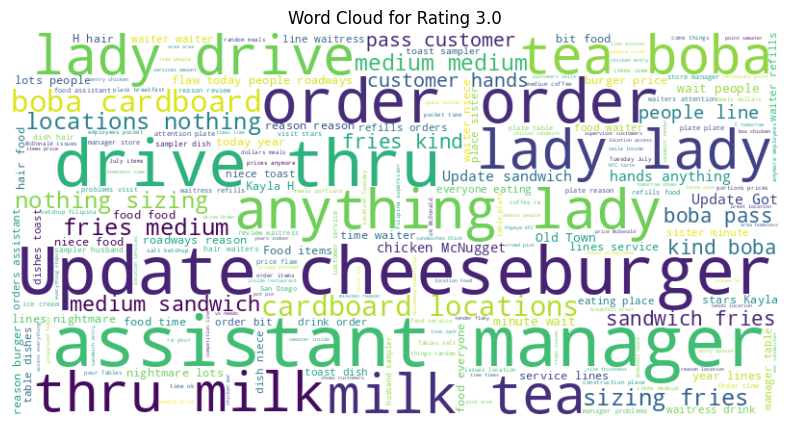

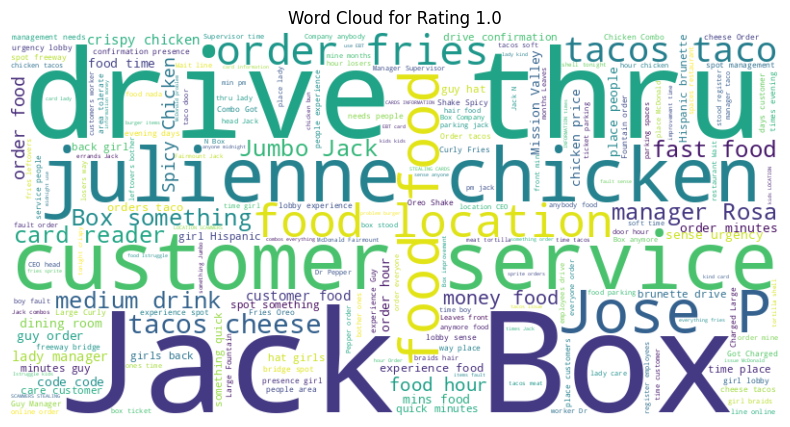

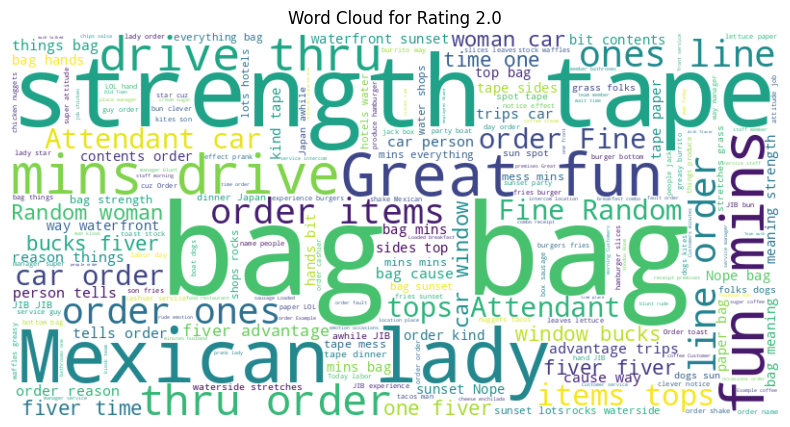

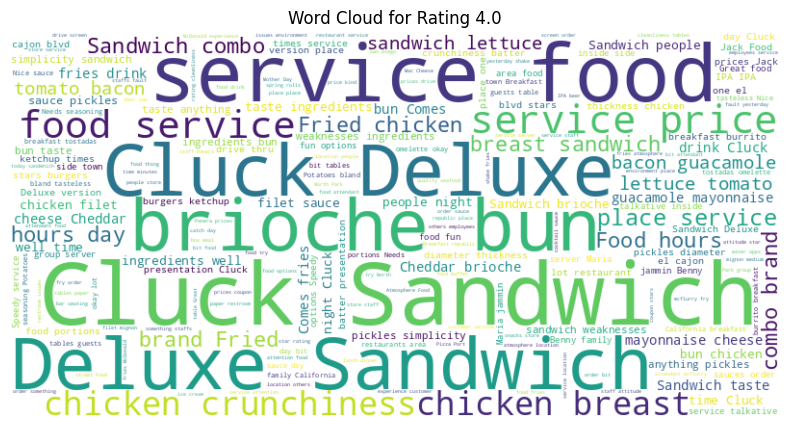

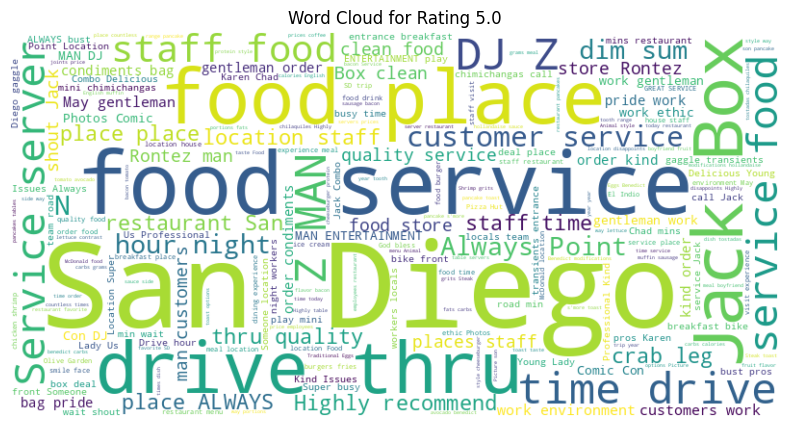

In [87]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# 1. Preparing the Data
reviews_df = sd_reviews[['review', 'review_rating']].copy()

# 2. Keyword Extraction for Each Star Rating
def extract_keywords(text):
    """Extract keywords from a text using TextBlob."""
    blob = TextBlob(text)
    keywords = [word for word, tag in blob.tags if tag.startswith('NN') and word.lower() not in stopwords.words('english')]  # Extract nouns
    return keywords

reviews_df['keywords'] = reviews_df['review'].astype(str).apply(extract_keywords)

# 3. Generating Word Clouds for Each Star Rating
star_ratings = reviews_df['review_rating'].unique()  # Changed to 'review_rating'

for rating in star_ratings:
    rating_reviews = reviews_df[reviews_df['review_rating'] == rating]  # Changed to 'review_rating'
    all_keywords = [keyword for keywords_list in rating_reviews['keywords'] for keyword in keywords_list]
    keyword_text = ' '.join(all_keywords)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keyword_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Rating {rating}')
    plt.show()

## **Data Visualization**

This section presents various visualizations to illustrate the key findings related to restaurant success factors, optimal locations, competitive strategies, menu pricing, and customer experience in San Diego, California. These visualizations aim to provide a clear and conside overview of the patterns and trends identified in the data, allowing new and prospective restaurant owners to make informed business decisions.

In [89]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

Distribution of Restaurant Ratings

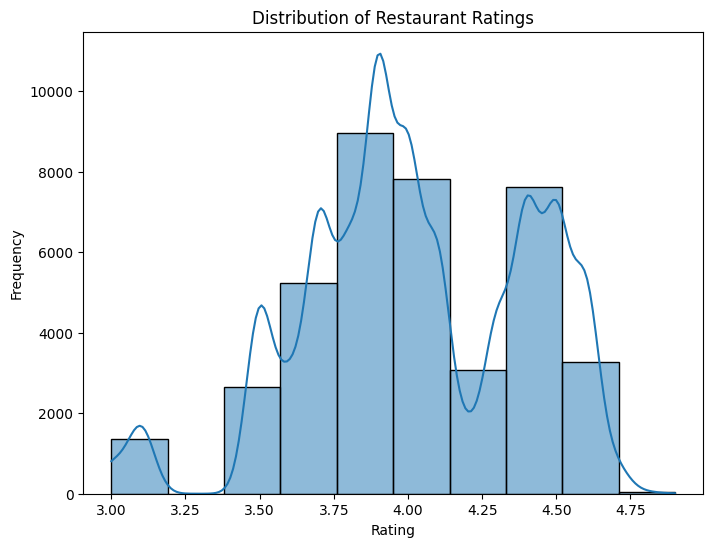

In [90]:
# Distribution of Restaurant Ratings
plt.figure(figsize=(8, 6))
sns.histplot(sd_reviews['rating'], bins=10, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Average Restaurant Rating by Cuisine Category

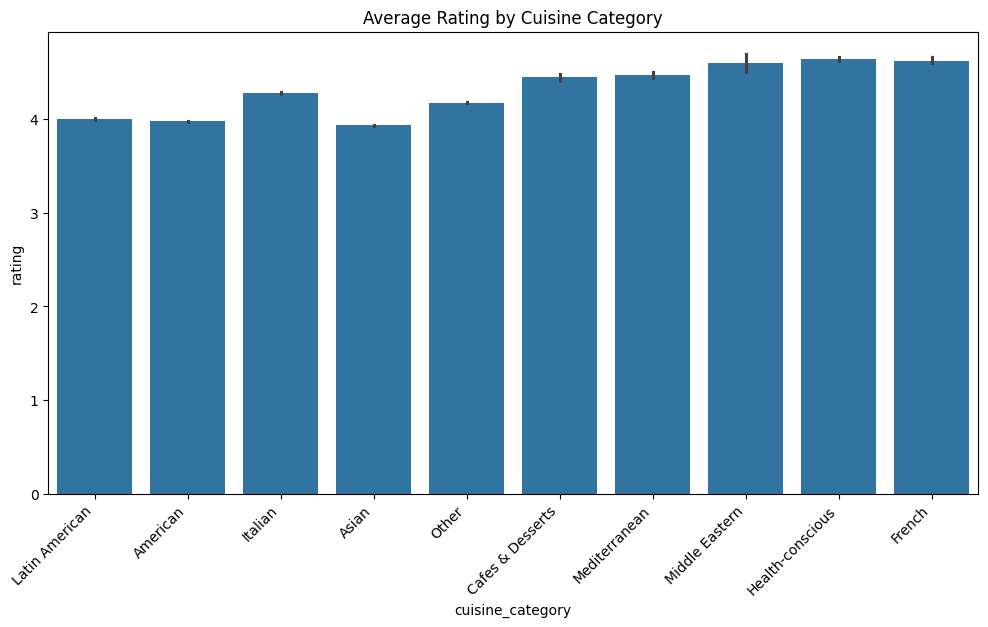

In [91]:
# Average Rating by Cuisine Category
plt.figure(figsize=(12, 6))
sns.barplot(x='cuisine_category', y='rating', data=sd_reviews)
plt.title('Average Rating by Cuisine Category')
plt.xticks(rotation=45, ha='right')
plt.show()

Average Restaurant Rating by Neighborhood

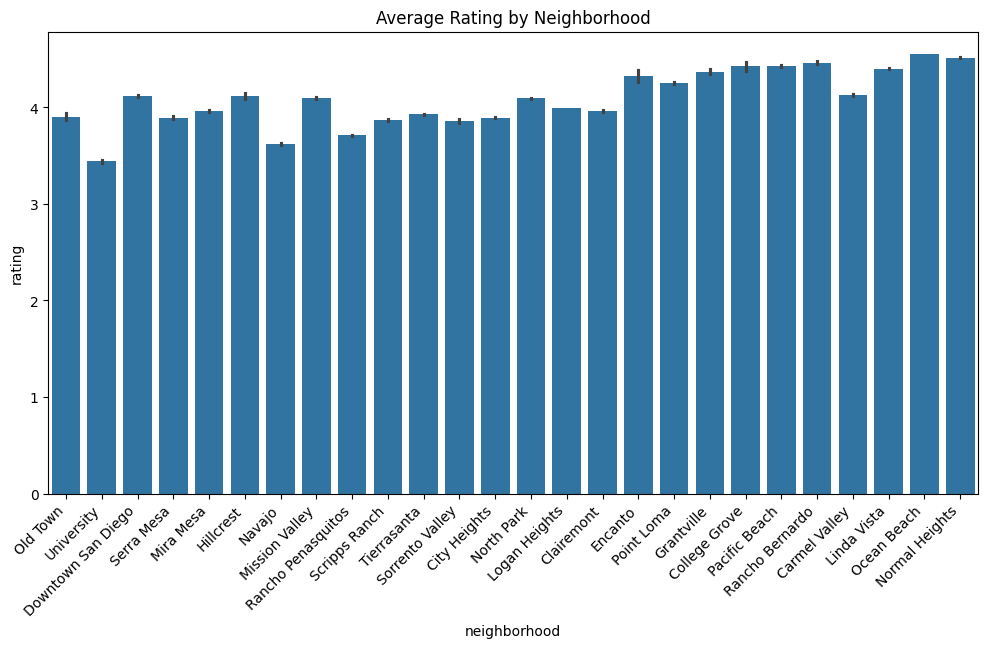

In [92]:
# Average Rating by Neighborhood
plt.figure(figsize=(12, 6))
sns.barplot(x='neighborhood', y='rating', data=sd_reviews)
plt.title('Average Rating by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.show()

Barplots Showing Count of Restaurants within each category and neighborhood

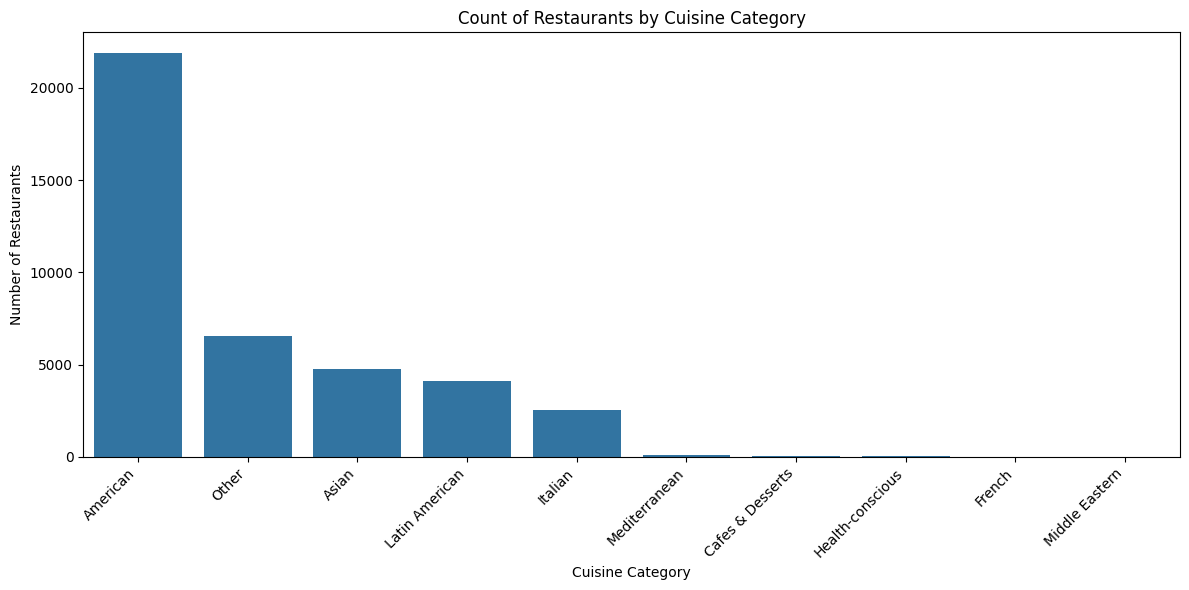

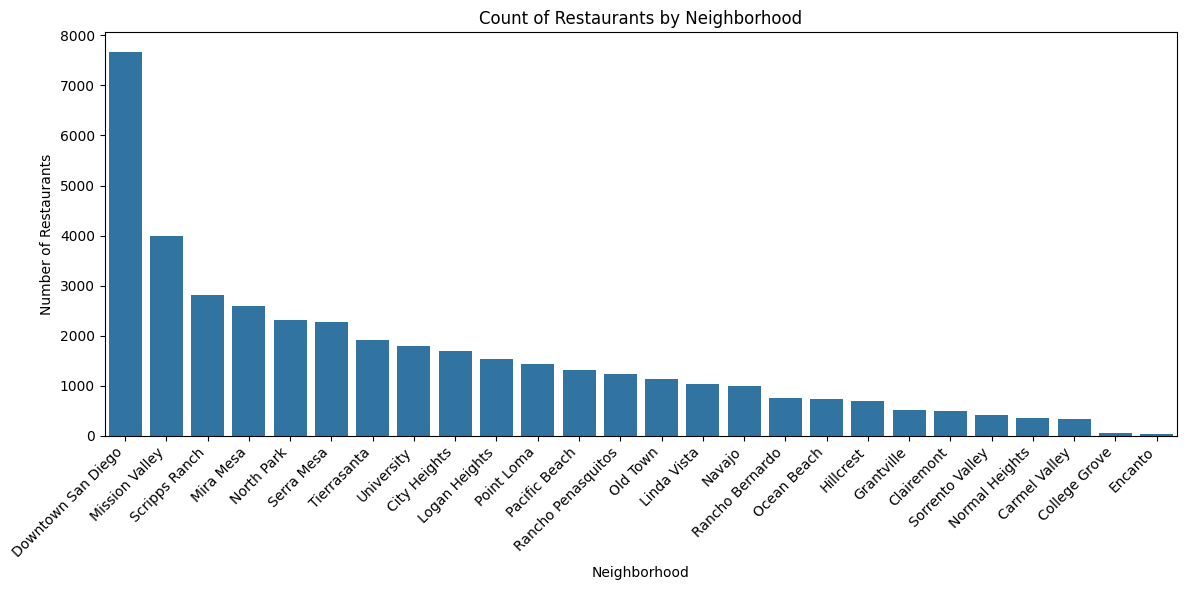

In [94]:
# 1. Count of Restaurants by Cuisine Category
cuisine_counts = sd_reviews['cuisine_category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=cuisine_counts.index, y=cuisine_counts.values)
plt.title('Count of Restaurants by Cuisine Category')
plt.xlabel('Cuisine Category')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# 2. Count of Restaurants by Neighborhood
neighborhood_counts = sd_reviews['neighborhood'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values)
plt.title('Count of Restaurants by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Optimal Location Recommendation Through Various Visuals: Identifying locations that have a lower density of existing restaurants in a particular cuisine type to reduce competition

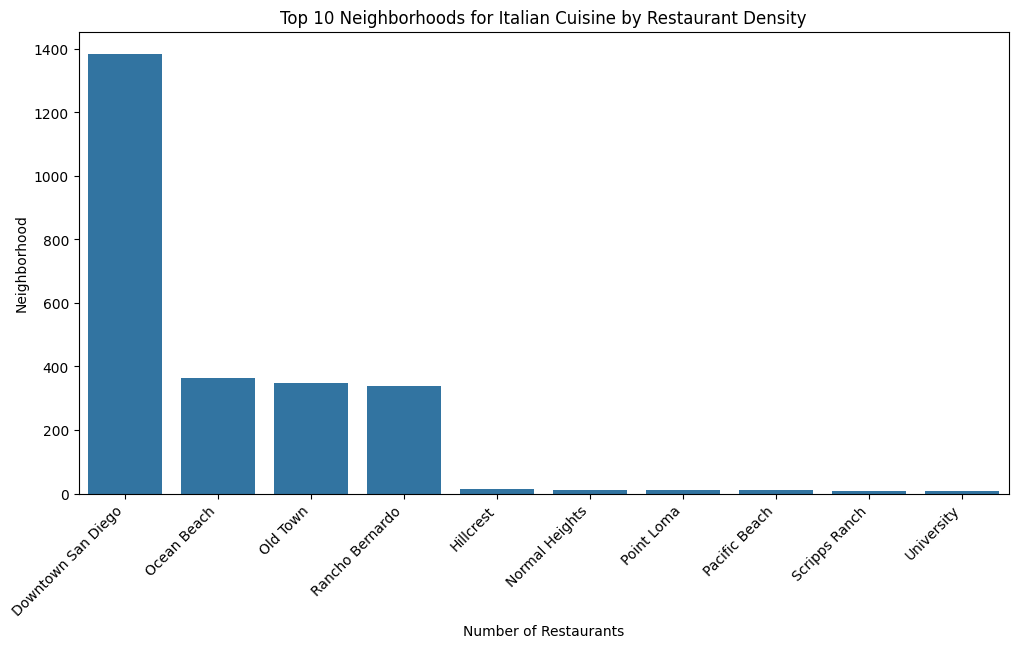

In [58]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

def visualize_optimal_locations(sd_reviews, cuisine_category):

    # Filtering data for the specified cuisine
    cuisine_data = sd_reviews[sd_reviews['cuisine_category'] == cuisine_category]

    # Calculating restaurant density per neighborhood
    restaurant_density = cuisine_data.groupby('neighborhood')['restaurant_name'].count().reset_index()
    restaurant_density.rename(columns={'restaurant_name': 'restaurant_count'}, inplace=True)

    # Calculating average rating per neighborhood
    avg_rating = cuisine_data.groupby('neighborhood')['rating'].mean().reset_index()

    # Merging density and rating data
    neighborhood_stats = pd.merge(restaurant_density, avg_rating, on='neighborhood')

    # Bar Plot: Top Neighborhoods by Restaurant Density
    top_density = neighborhood_stats.sort_values('restaurant_count', ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='neighborhood', y='restaurant_count', data=top_density)
    plt.title(f'Top 10 Neighborhoods for {cuisine_category} Cuisine by Restaurant Density')
    plt.xlabel('Number of Restaurants')
    plt.ylabel('Neighborhood')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Example Usage
cuisine_category = 'Italian'  # Replace with your desired cuisine
visualize_optimal_locations(sd_reviews, cuisine_category)

Save all code to HTML

In [ ]:
# Save